<a href="https://colab.research.google.com/github/fabehashahzad/CNN-model-on-cifar-10/blob/main/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
29/29 [==============================] - 25s 587ms/step - loss: 2.5792 - accuracy: 0.1056 - val_loss: 2.3708 - val_accuracy: 0.1000
Epoch 2/30
29/29 [==============================] - 7s 255ms/step - loss: 2.3447 - accuracy: 0.1267 - val_loss: 2.2552 - val_accuracy: 0.1633
Epoch 3/30
29/29 [==============================] - 6s 217ms/step - loss: 2.2803 - accuracy: 0.1478 - val_loss: 2.2759 - val_accuracy: 0.1367
Epoch 4/30
29/29 [==============================] - 5s 173ms/step - loss: 2.2337 - accuracy: 0.1611 - val_loss: 2.3360 - val_accuracy: 0.1067
Epoch 5/30
29/29 [==============================] - 7s 250ms/step - loss: 2.2289 - accuracy: 0.1744 - val_loss: 2.2657 - val_accuracy: 0.1467
Epoch 6/30
29/29 [==============================] - 5s 177ms/step - loss: 2.2152 - accuracy: 0.1822 - val_loss: 2.2630 - val_accuracy: 0.1233
Epoch 7/30
29/29 [==============================] - 6s 207ms/step - loss: 2.1627 - accuracy: 0.1933 - val_loss: 2.1907 - val_accuracy: 0.2000
Epoch

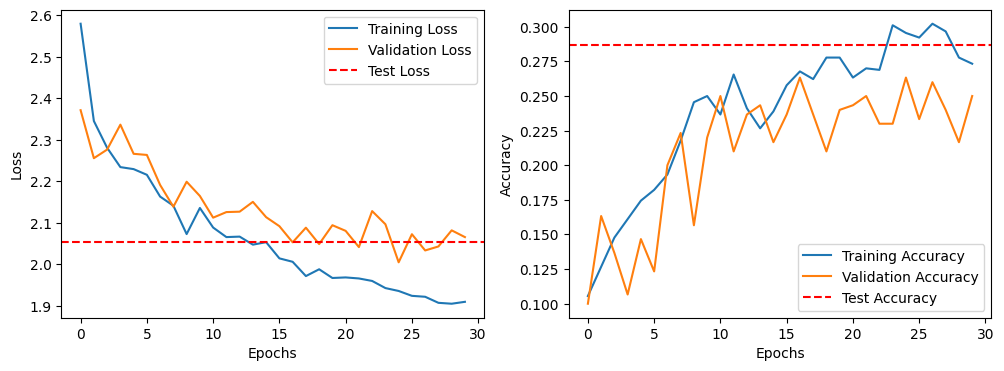

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (_, _) = cifar10.load_data()
train_images = train_images / 255.0

# Select the first 150 images in each class to create a MINI CIFAR-10
num_classes = 10
mini_images = []
mini_labels = []

for i in range(num_classes):
    indices = np.where(train_labels.flatten() == i)[0][:150]
    mini_images.append(train_images[indices])
    mini_labels.extend([i] * len(indices))

mini_images = np.concatenate(mini_images, axis=0)
mini_labels = np.array(mini_labels)

# Split the MINI CIFAR-10 dataset into train, validation, and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(
    mini_images, mini_labels, test_size=0.4, stratify=mini_labels, random_state=42)
valid_images, test_images, valid_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

# Define RESNET50 architecture
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 30 epochs
history = model.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training loss, validation loss, and test loss
plt.figure(figsize=(12, 4))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
